### Table of contents<a class='anchor' id='top'></a>
- [Importing Packages](#1)
- [Importing Data](#2)
- [Exploratory Data Analysis](#3)
- [Selecting a Feature](#4)


# 1. Importing Packages <a class='anchor' id='1'></a> [↑](#top)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 2. Importing Data <a class='anchor' id='2'></a> [↑](#top)

We are using the "continoous factory process" dataset. You can find the original dataset [here](https://www.kaggle.com/datasets/supergus/multistage-continuousflow-manufacturing-process).

In [2]:
raw_data = pd.read_csv(".\continuous_factory_process.csv")
raw_data.head()

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


We are only interested in the stage one output values. We select the corresponding columns.

In [3]:
last_col = "Stage1.Output.Measurement14.U.Setpoint"
first_col = "Stage1.Output.Measurement0.U.Actual"
subset_df = raw_data.loc[:,first_col:last_col]
subset_df

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement4.U.Setpoint,...,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement10.U.Setpoint,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement11.U.Setpoint,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual,Stage1.Output.Measurement14.U.Setpoint
0,12.72,13.75,0.0,22.74,12.16,13.02,21.97,21.88,0.00,32.55,...,8.06,8.65,5.54,6.16,1.66,2.02,2.69,3.16,14.51,17.72
1,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
2,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
3,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
4,12.29,13.75,0.0,22.74,0.00,13.02,17.83,21.88,31.44,32.55,...,7.54,8.65,5.15,6.16,1.15,2.02,2.72,3.16,0.00,17.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,...,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00,17.72
14084,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,...,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00,17.72
14085,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,...,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00,17.72
14086,12.58,13.75,0.0,22.74,8.99,13.02,21.84,21.88,31.55,32.55,...,7.66,8.65,0.00,6.16,1.40,2.02,3.30,3.16,0.00,17.72


# 3. Exploratory Data Analysis <a class='anchor' id='3'></a> [↑](#top)

We are looking for a feature that has:
1. high variance
2. many values (few errorous readings)
3. visually symmetric distribution

In [4]:
def plot_data(data,colname):
    plt.figure(figsize=(8, 4))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
    plt.title(colname)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

We iterate over all the columns of the selected dataframe. Note that every uneven indexed column contains setpoint values and no feature. Therefore we skip it in the analysis. 

Stage1.Output.Measurement0.U.Actual has length of: 13992


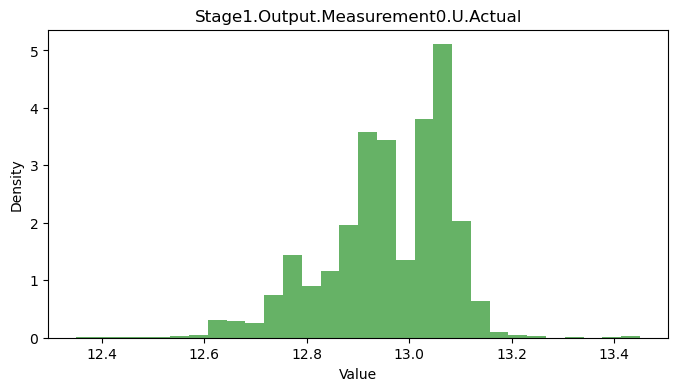

Mean: 12.961320356111427, Standard Deviation: 0.20578806255755808
*********************************************************************
Stage1.Output.Measurement1.U.Actual has length of: 8145


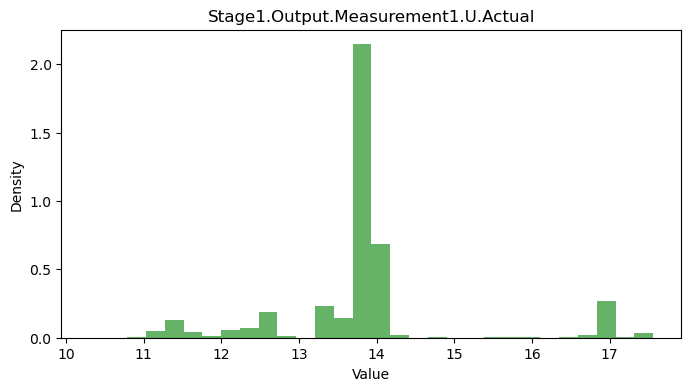

Mean: 13.860288529792253, Standard Deviation: 1.2386269320674488
*********************************************************************
Stage1.Output.Measurement2.U.Actual has length of: 13683


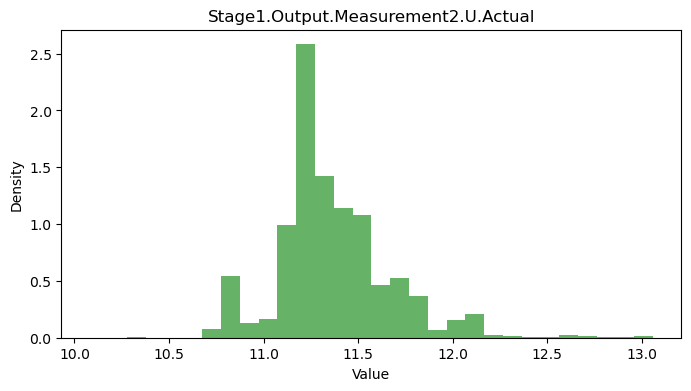

Mean: 11.42726179025425, Standard Deviation: 0.5552061813811813
*********************************************************************
Stage1.Output.Measurement3.U.Actual has length of: 13936


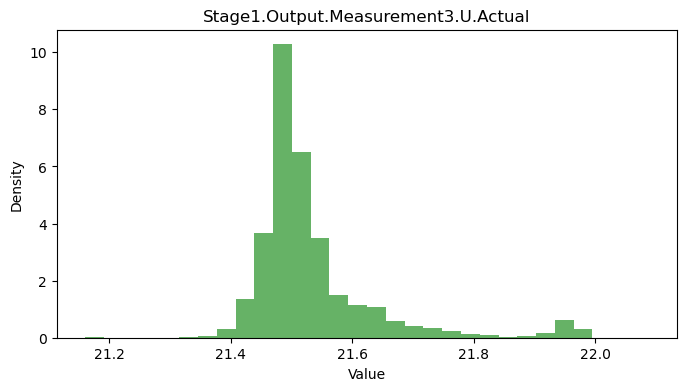

Mean: 21.53228182845825, Standard Deviation: 0.2322184797588809
*********************************************************************
Stage1.Output.Measurement4.U.Actual has length of: 13866


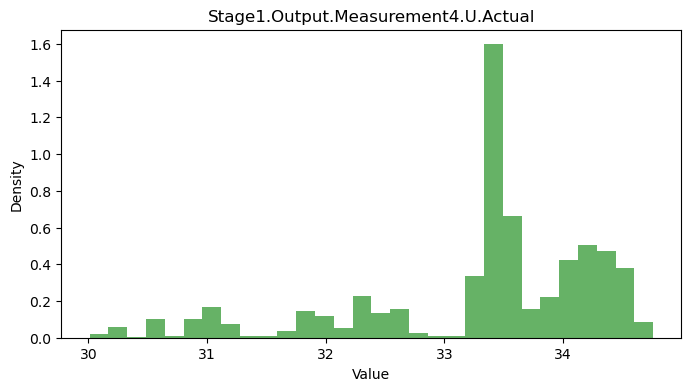

Mean: 33.29345171012493, Standard Deviation: 1.1118684625456932
*********************************************************************
Stage1.Output.Measurement5.U.Actual has length of: 639


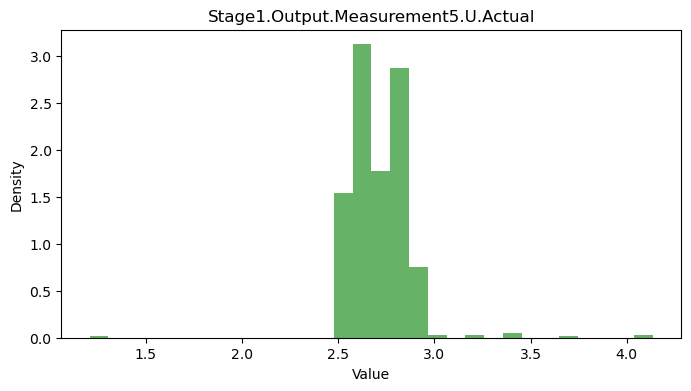

Mean: 2.61869678646263, Standard Deviation: 0.5589233587457205
*********************************************************************
Stage1.Output.Measurement6.U.Actual has length of: 9205


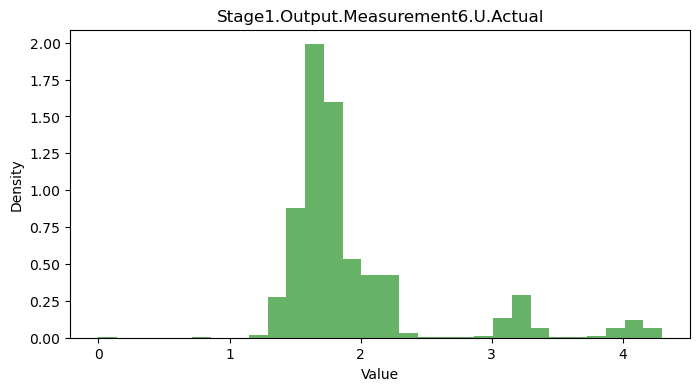

Mean: 2.01090027957207, Standard Deviation: 0.7643165637453848
*********************************************************************
Stage1.Output.Measurement7.U.Actual has length of: 5312


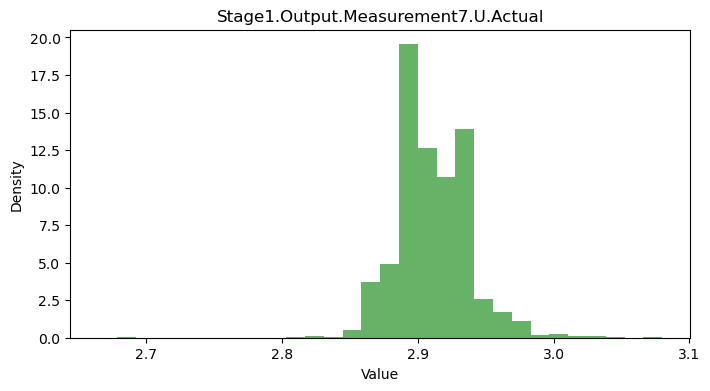

Mean: 2.913887164626762, Standard Deviation: 0.09338092581081735
*********************************************************************
Stage1.Output.Measurement8.U.Actual has length of: 13284


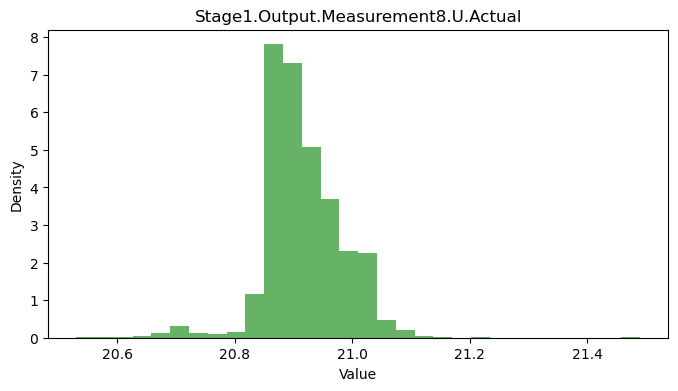

Mean: 20.910256918845654, Standard Deviation: 0.27066687501995895
*********************************************************************
Stage1.Output.Measurement9.U.Actual has length of: 13028


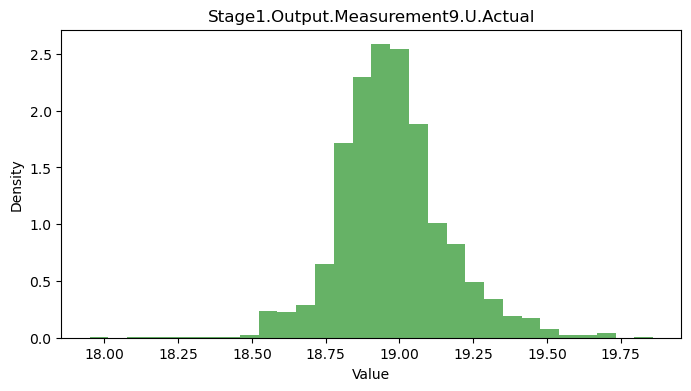

Mean: 18.940695109373788, Standard Deviation: 0.3312371817824751
*********************************************************************
Stage1.Output.Measurement10.U.Actual has length of: 13797


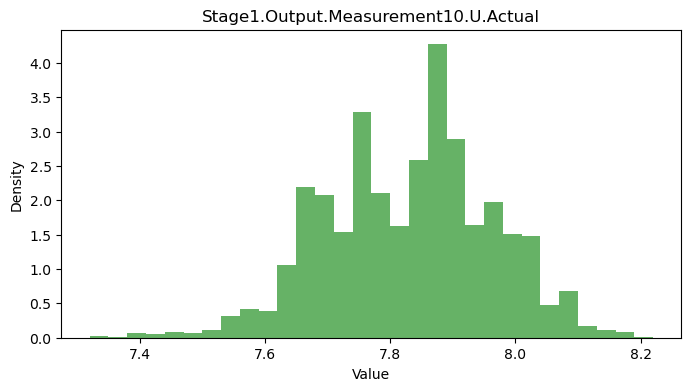

Mean: 7.831358165867284, Standard Deviation: 0.1734257067150523
*********************************************************************
Stage1.Output.Measurement11.U.Actual has length of: 3592


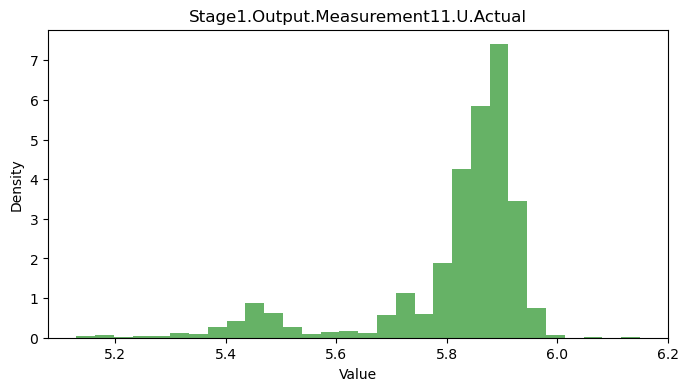

Mean: 5.814152181903236, Standard Deviation: 0.2360656514201106
*********************************************************************
Stage1.Output.Measurement12.U.Actual has length of: 10864


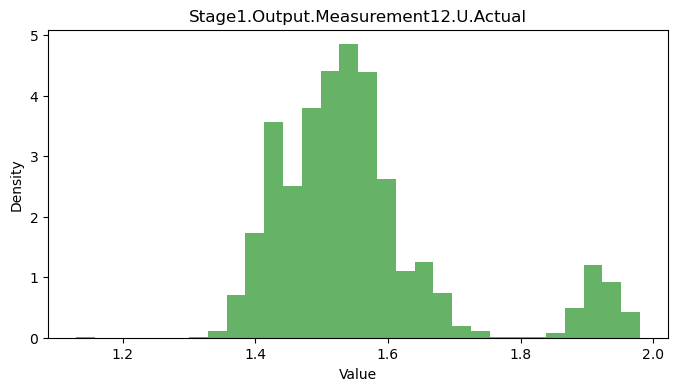

Mean: 1.5556933936411457, Standard Deviation: 0.14405287970000713
*********************************************************************
Stage1.Output.Measurement13.U.Actual has length of: 12902


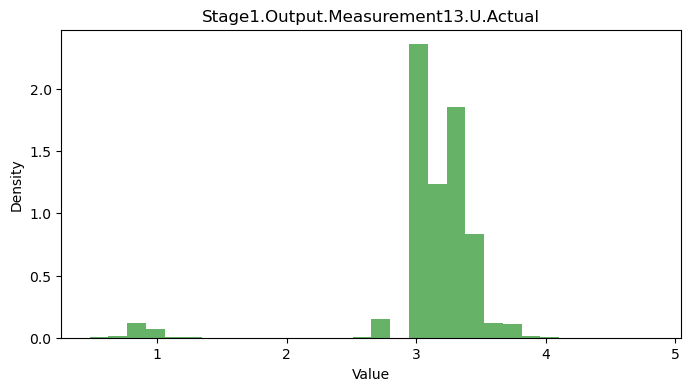

Mean: 2.9531685289125504, Standard Deviation: 0.8334616841536808
*********************************************************************
Stage1.Output.Measurement14.U.Actual has length of: 8951


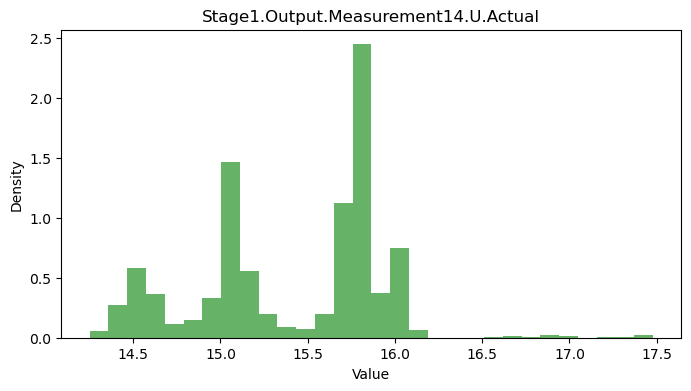

Mean: 15.43960458595959, Standard Deviation: 0.6825142882428149
*********************************************************************


In [5]:
for i,col in enumerate(subset_df.columns):
    #only loo at relevant columns
    if i % 2 == 1:
        continue

    #stat_data becomes the current temporary dataset, since 0 denotes errors, we remove it before calculating the mean and std. 
    dataset = subset_df.iloc[:,i]
    dataset = dataset[(dataset > 0)]

    mean = dataset.mean()
    std = dataset.std()
    
    #further we eliminate runaway values by limiting the range of values to three times the standard deviation of each dataset
    dataset = dataset[(dataset < mean + 3 * std) & (dataset > mean - 3 * std)]

    dataset = list(dataset)
    print(col,"has length of:",len(dataset))            
    plot_data(dataset,col)
    print(f"Mean: {mean}, Standard Deviation: {std}")
    
    print("*********************************************************************") 
    

# 4. Selecting a Feature <a class='anchor' id='4'></a> [↑](#top)

Since we have many datapoints and a visually symmetrical distribution we choose output measurement 9, which is column 18.

330    17.95
331    17.95
332    17.95
333    18.09
334    18.09
Name: Stage1.Output.Measurement9.U.Actual, dtype: float64


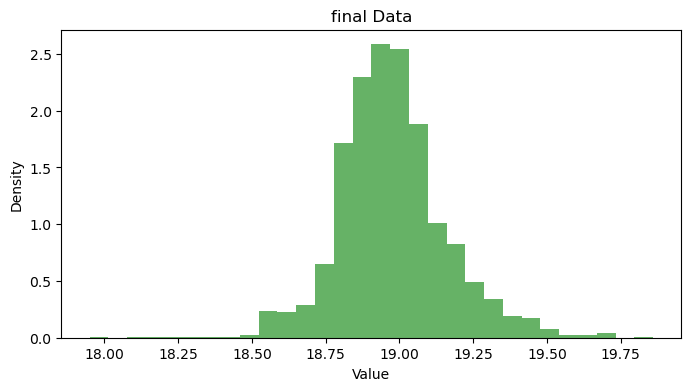

In [31]:
dataset = subset_df.iloc[:,18]

dataset = dataset[(dataset > 0)]

mean = dataset.mean()
std = dataset.std()

dataset = dataset[(dataset < mean + 3 * std) & (dataset > mean - 3 * std)]

min = dataset.min()
max = dataset.max()

print(dataset.head())
plot_data(dataset,"final Data")

In [32]:
dataset.to_csv("real_dataset.csv")